In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import cv2
from PIL import Image

In [2]:
#loaded_model = tf.keras.models.load_model('best_model.h5')
#Erro

In [3]:
json_file = open("model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
model.load_weights("best_model.h5")

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)



In [4]:
def read_images(folder_path):
    
    folders = [folder_path + "/horses", folder_path + "/humans"]

    images = []
    labels = []

    #Reading images and saving into the images array
    for counter, folder in enumerate(folders):
        for file in os.listdir(folder):
            img = tf.keras.preprocessing.image.load_img(os.path.join(folder, file))
            img_array = keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(counter) # 0 is horse and 1 is human
    
    images = np.array(images)
    images = tf.keras.utils.normalize(images)

    labels = np.array(labels)

    #Shuffle all the data not to keep well separeted
    ts = int(time.time())
    np.random.seed(ts)
    np.random.shuffle(images)
    np.random.seed(ts)
    np.random.shuffle(labels)

    return images, labels
    
x_test, y_test = read_images("dataset/teste")

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1) 
print('Test accuracy:', test_acc)

8/8 [==============================] - 8s 872ms/step - loss: 0.1716 - accuracy: 0.9570
Test accuracy: 0.95703125


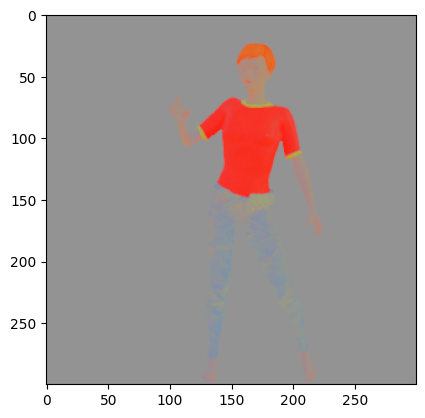

1/1 [==============================] - 0s 149ms/step

Resultado encontrado:  Human
Resultado esperado:  Human 



In [9]:
result_label = ["Horse", "Human"]

index = 255

image = x_test[index].reshape(1,300,300,3)

plt.figure()
plt.imshow(image[0])
plt.show
plt.pause(0.001)

prediction = model.predict(image)

print("\nResultado encontrado: ", result_label[np.argmax(prediction)])
print("Resultado esperado: ", result_label[int(y_test[index])], "\n")